In [1]:
# Import the python libraries to have all functions needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv("ESS-0110.asc")
# Preview the first 5 lines of the loaded data 
print(data)

             0    0.000000000E+00   -6.626801938E-02
0            1             0.0001          -0.066286
1            2             0.0002          -0.066303
2            3             0.0003          -0.066313
3            4             0.0004          -0.066326
4            5             0.0005          -0.066342
...        ...                ...                ...
99994    99995             9.9995          -0.066231
99995    99996             9.9996          -0.066209
99996    99997             9.9997          -0.066180
99997    99998             9.9998          -0.066154
99998    99999             9.9999          -0.066139

[99999 rows x 3 columns]


(99999, 3)

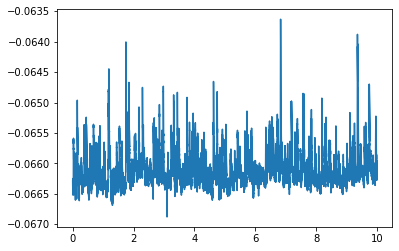

In [2]:
# Plot the membrane potential as a function of time
plt.plot(data.values[:,1],data.values[:,2])
np.shape(data.values)

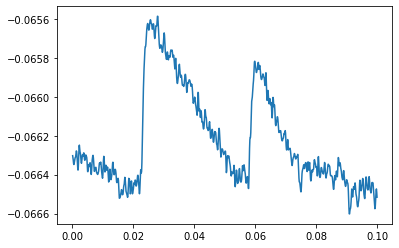

In [3]:
plt.plot(data.values[1:1000,1],data.values[1:1000,2]);

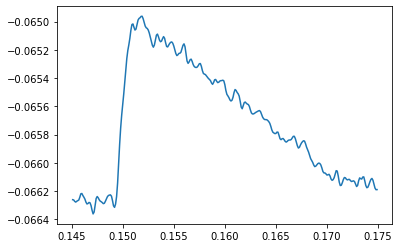

In [4]:
plt.plot(data.values[1450:1749,1],data.values[1450:1749,2]);

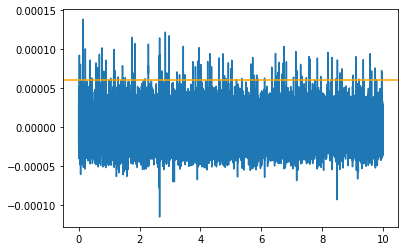

In [5]:
plt.plot(data.values[1:,1],np.diff(data.values[:,2]))
plt.axhline(y =0.00006, color = "orange")

In [6]:
dV= np.diff(...)
IndMax= ...
data.values[IndMax,1]

ValueError: diff requires input that is at least one dimensional

In [ ]:
dV = np.diff(data.values[:,2])
IndMax = np.argmax(dV)
print(IndMax)
data.values[IndMax,1]


1495


0.1496

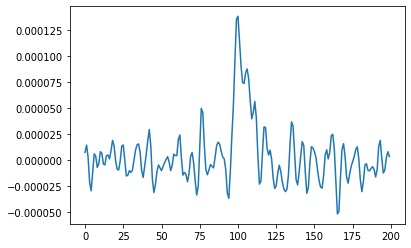

In [ ]:
plt.plot(dV[IndMax-100:IndMax+100])

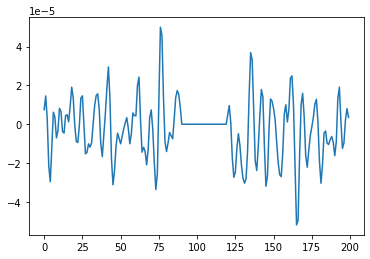

In [ ]:
dV[IndMax-10:IndMax+20]=np.zeros(30)
plt.plot(dV[IndMax-100:IndMax+100])

In [ ]:
students_today=[]
students_today.append("Morgane")
students_today.append("Paul")
print(students_today)


['Morgane', 'Paul']
[2, 3, 3, 3, 3]


In [ ]:
data.values[IndMax-5: IndMax+10,2].shape

(15,)

In [ ]:
#write a code that looks at every maximum difference that is larger than the threshold, saves it as an event time & shape
#and thenmakes the 5 elements before and 10 elements after equal to 0, so that it can go to the next round
#Event shapes should be 50 ts before the index and 250 ts after
dV= ...
EventTimes=[] #time data.values[...,1]
EventShapes=[] #voltage data.values[...,2]
DiffMax= np.max(dV)
while DiffMax > 6e-5:
    IndMax= ...
    EventTimes.append(...) # append 50 ts before and 250 after in the time array
    #make 5 before and 10 after equal to 0
    #calculate DiffMax again
    EventShapes.append(...) # append 50 ts before and 250 after in the voltage arraya
#plot
#find the shape

TypeError: '>' not supported between instances of 'ellipsis' and 'float'

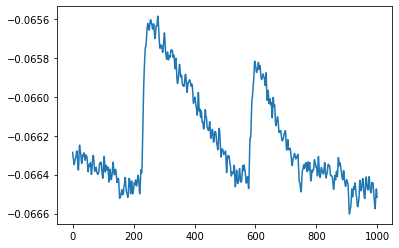

In [7]:
plt.plot(data.values[:1000,2])

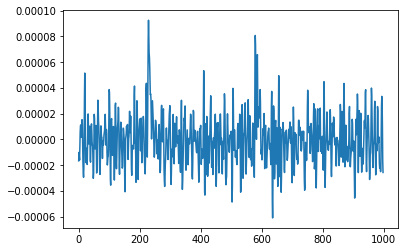

In [8]:
plt.plot(np.diff(data.values[:1000,2]))

In [9]:
dV=np.diff(data.values[:,2])
EventTimes=[]
EventShapes=[]
DiffMax=np.max(dV)
while DiffMax>6e-5:
    IndMax=np.argmax(dV)
    # EventTimes.append(data.values[IndMax-50:IndMax+250,1])
    EventTimes.append(data.values[IndMax,1])
    dV[IndMax-5:IndMax+10]=np.zeros(15)
    DiffMax=np.max(dV)
    EventShapes.append(data.values[IndMax-50:IndMax+250,2])

In [10]:
np.mean(EventShapes, axis = 0).shape

(300,)

In [11]:
EventShapes = np.array(EventShapes)
EventShapes.shape

(121, 300)

(121, 300)

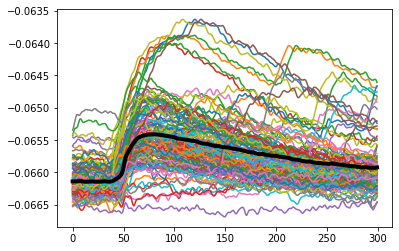

In [12]:
plt.plot(np.transpose(EventShapes))
plt.plot(np.mean(EventShapes, axis = 0), color="black", lw=4)
np.shape(EventShapes)

In [13]:
EventShapeArray=np.asarray(EventShapes)


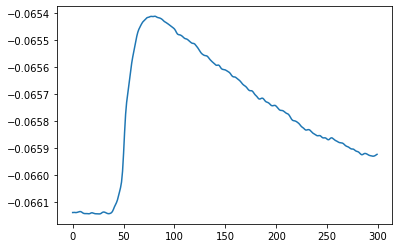

In [14]:
plt.plot(np.mean(EventShapeArray, axis = 0))

In [15]:
Maxis=np.amax(EventShapeArray,axis=1)
Minis=np.amin(EventShapeArray,axis=1)
print(1000*np.mean(Maxis-Minis))
print(1000*np.std(Maxis-Minis))
np.shape(Maxis)

1.0382063876033047
0.49335401190526657


(121,)

In [16]:
Baseline=np.mean(EventShapeArray[:,0:20],axis=1)
np.shape(Baseline)
print(1000*np.mean(Maxis-Baseline))
print(1000*np.std(Maxis-Baseline))

0.9072688400247927
0.5307170283074304


In [17]:
temp= np.where(np.diff(data.values[:,2]) > 6*1e-5) #Your threshold is 0.00006 Find all the points in the diff higher than the threshold
Indexes=temp[0]
Indexes
IndexDiff= np.diff(Indexes) #find the difference between the indexes
temp2= np.where(IndexDiff >10) #find where the difference is greater than 10
np.shape(temp2[0])
Jumps=np.block([0,temp2[0]])
# plt.plot(Indexes[Jumps]) #plotting
# JumpInd=Indexes[Jumps]
np.shape(Jumps)[0]



109

In [18]:
Jumps[0]

0

In [19]:
AllEPSPs=np.zeros((109,500))
for i in range(len(Jumps)):
    AllEPSPs[i,:500]= data.values[Indexes[Jumps[i]]-50:Indexes[Jumps[i]]+450, 2] #consider an EPSP the whole duration 50 ts before the jump index to 450 ts after

#plotting
#plot the mean

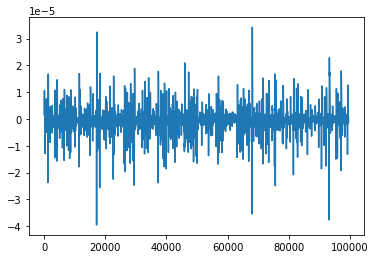

In [20]:
ConvWindow=np.mean(EventShapeArray, axis = 0)-np.mean(np.mean(EventShapeArray, axis = 0))
ConvolvedTrace = np.convolve(data.values[:,2], ConvWindow, mode='same')
plt.plot(ConvolvedTrace[200:99800])

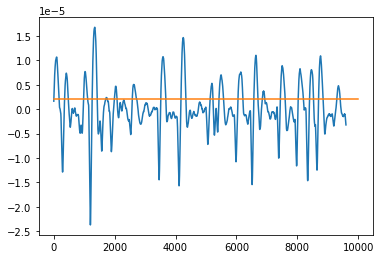

In [21]:
plt.plot(ConvolvedTrace[200:9800])
plt.plot([0,10000],[0.000002,0.000002])

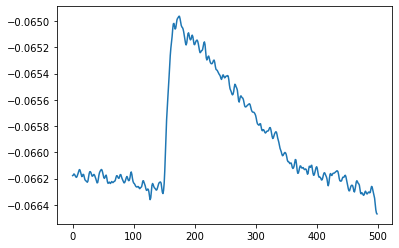

In [22]:
IndMaxConv=np.argmax(ConvolvedTrace[200:9800])
plt.plot(data.values[IndMaxConv:IndMaxConv+500,2])

(138, 600)

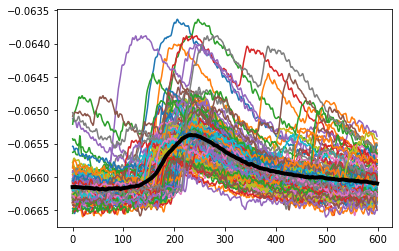

In [23]:
ConvV=ConvolvedTrace[100:99000]
EventTimes=[]
EventShapes=[]
DiffMax=np.max(ConvV)
while DiffMax> 7e-6:
    IndMax=np.argmax(ConvV)
    EventTimes.append(data.values[IndMax,1])
    
    ConvV[IndMax-40:IndMax+100]=np.zeros(140)
    DiffMax=np.max(ConvV)
    EventShapes.append(data.values[IndMax-100:IndMax+500,2])

plt.plot(np.transpose(EventShapes))
plt.plot(np.mean(EventShapes, axis = 0),  color="black", lw=4)

np.shape(EventShapes)